# Curso de Capacitación en Python para Data Science - Desafío 3

<img src='https://dci.pucp.edu.pe/wp-content/uploads/2014/02/logo-color-pucp1.gif' width=200px>


Dr. Edwin Villanueva, Dr. Soledad Espezua, Ing. Daniel Saromo

<font color='#33FFEE'> Reducción de dimensionalidad usando PCA.</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

## Desafío de la semana: Real State Valuation Dataset <font color=red> (20 puntos) </font>

Fuente del dataset: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

**Descripción de los atributos:**

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

## Obtención de los datos

In [1]:
#libraries required
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Carga datos de un archivo csv
filename = "real_state_valuation.xlsx"

real_state_data = pd.read_excel(filename,sheet_name='Hoja1')

real_state_data.head()  # muestra los 5 primeros registros del DataFrame

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
precios = real_state_data['Y house price of unit area'] #labels en un numpy array
precios = np.reshape(precios.values,(precios.shape[0],1))
precios.shape

(414, 1)

Eliminamos la columna de ID, porque la información que brinda es la misma que el índice del DataFrame:

In [4]:
real_state_data.drop(columns=['X1 transaction date','No'], inplace=True)

In [5]:
real_state_data.shape

(414, 6)

In [6]:
house_price_per_unit_area = real_state_data['Y house price of unit area'].values

In [7]:
house_price_per_unit_area.sum()

15723.8

In [8]:
real_state_data.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Histogramas

In [9]:
hist, bin_edges = np.histogram(house_price_per_unit_area, 100)

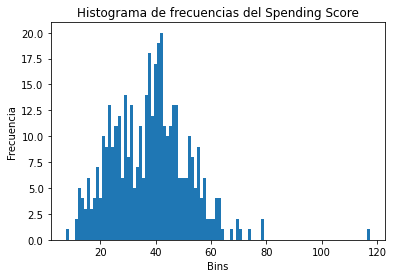

In [10]:
plt.hist(house_price_per_unit_area, bins=bin_edges)
plt.xlabel('Bins')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencias del Spending Score')
plt.show()

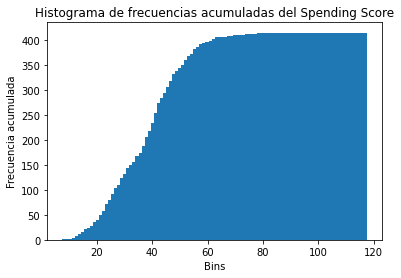

In [11]:
plt.hist(house_price_per_unit_area, bins=bin_edges, cumulative=True)

plt.xlabel('Bins')
plt.ylabel('Frecuencia acumulada')
plt.title('Histograma de frecuencias acumuladas del Spending Score')
plt.show()

## Discretización

El presente dataset tiene valores a predecir (targets) continuos. La metolodogía PCA permite realizar una reducción dimensional de los atributos, sin importar el tipo de target. Vamos a comparar la visualización PCA del target con valores continuos, y su versión discretizada, según rangos de valores.

Elegimos valores que dividan uniformemente a las muestras, según su precio por unidad de área.

In [12]:
etiquetas_discretizacion = [1,2,3,4]
intervalos_discretizacion = [0, 26, 37, 45,118]

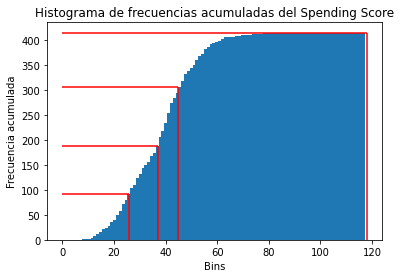

In [13]:
plt.hist(house_price_per_unit_area, bins=bin_edges, cumulative=True)

for val in intervalos_discretizacion:
    tillHere = np.where(bin_edges<val,1,0).sum()
    y_acum_forThis_val = hist[:tillHere].sum() 
    plt.vlines(val,0,y_acum_forThis_val, color='r', linestyle='-')
    plt.hlines(y_acum_forThis_val,0,val, color='r', linestyle='-')

plt.xlabel('Bins')
plt.ylabel('Frecuencia acumulada')
plt.title('Histograma de frecuencias acumuladas del Spending Score')
plt.show()

Se van a discretizar las muestras de acuerdo a 4 rangos, siendo `x` el valor del precio `'Y house price of unit area'`:

-  0 <= x <=  26
- 26  < x <=  37
- 37  < x <=  45
- 45  < x <= 118

In [14]:
intervalos_discretizacion

[0, 26, 37, 45, 118]

In [19]:
real_state_data_withCategories = real_state_data.copy()

real_state_data_withCategories['binned'] = pd.cut(real_state_data['Y house price of unit area'], bins=intervalos_discretizacion, include_lowest=True, labels=etiquetas_discretizacion)

In [20]:
real_state_data_withCategories

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,binned
0,32.0,84.87882,10,24.98298,121.54024,37.9,3
1,19.5,306.59470,9,24.98034,121.53951,42.2,3
2,13.3,561.98450,5,24.98746,121.54391,47.3,4
3,13.3,561.98450,5,24.98746,121.54391,54.8,4
4,5.0,390.56840,5,24.97937,121.54245,43.1,3
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,1
410,5.6,90.45606,9,24.97433,121.54310,50.0,4
411,18.8,390.96960,7,24.97923,121.53986,40.6,3
412,8.1,104.81010,5,24.96674,121.54067,52.5,4


In [21]:
labels = real_state_data_withCategories['binned'].values

In [22]:
features = list(real_state_data_withCategories.columns.to_list())[:-2] #vemos los nombres de los atributos
features

['X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude']

Actualizamos el dataset:

In [23]:
real_state_data = real_state_data_withCategories

Ahora, exploremos del dataset con los categories:

In [24]:
real_state_data.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [25]:
real_state_data.tail() #imprimimos las 5 últimas muestras

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,binned
409,13.7,4082.01500,0,24.94155,121.50381,15.4,1
410,5.6,90.45606,9,24.97433,121.54310,50.0,4
411,18.8,390.96960,7,24.97923,121.53986,40.6,3
412,8.1,104.81010,5,24.96674,121.54067,52.5,4
413,6.5,90.45606,9,24.97433,121.54310,63.9,4


## Estandarización de los datos

Estandarizar todos los atributos para que tengan media 0 y varianza 1. Verificar el resultado haciendo un Box plot de los 5 atributos numéricos:  <font color=red> (2 puntos) </font>

Vamos a aplicar la [función](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) `StandardScaler` de la librería sklearn, para que los datos estén distribuidos de forma que tengan media 0 y desviación estándar de 1. Sin embargo, se debe aplicar esta transformación a las columnas que son atributos, pero no al label ni su versión discretizada (`'binned'`).

In [26]:
features

['X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude']

In [27]:
 #seleccionamos todas las filas, pero solamente las columnas cuyas etiquetas estén en la variable features
x = real_state_data.loc[:, features].values

#la siguiente fila es un auto-verificador para que vean si realizaron correctamente la extracción: NO BORRARLA :)
assert x.shape == (414,5), "La extracción de los datos para aplicar StandardScaler no está bien ejecutada"

In [28]:
from sklearn.preprocessing import StandardScaler
scalerXD = StandardScaler().fit(x)
x = scalerXD.transform(x)

In [29]:
np.mean(x),np.std(x)

(-2.9608800650144757e-13, 1.0)

Por comodidad, cambiemos las etiquetas de las columnas a una forma más genérica:

In [30]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
feat_cols

['feature0', 'feature1', 'feature2', 'feature3', 'feature4']

In [31]:
normalised_dataset = pd.DataFrame(x,columns=feat_cols)

In [32]:
normalised_dataset.tail()

,feature0,feature1,feature2,feature3,feature4
409,-0.352637,2.378365,-1.391638,-2.216993,-1.927835
410,-1.064493,-0.788071,1.667503,0.427579,0.635341
411,0.095568,-0.549678,0.987694,0.822893,0.423972
412,-0.844784,-0.776684,0.307885,-0.184755,0.476814
413,-0.985398,-0.788071,1.667503,0.427579,0.635341


In [33]:
normalised_dataset.describe()

,feature0,feature1,feature2,feature3,feature4
count,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02
mean,-6.704245e-17,-1.161175e-16,-1.072679e-18,1.343228e-13,-1.614546e-12
std,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00
min,-1.556639e+00,-8.412787e-01,-1.391638e+00,-2.981805e+00,-3.903223e+00
25%,-7.634921e-01,-6.303115e-01,-1.051734e+00,-4.864845e-01,-3.441981e-01
50%,-1.417172e-01,-4.693493e-01,-3.202000e-02,1.669943e-01,3.437301e-01
75%,9.172774e-01,2.938267e-01,6.477891e-01,6.796928e-01,6.487148e-01
max,2.292652e+00,4.287008e+00,2.007407e+00,3.675611e+00,2.146891e+00


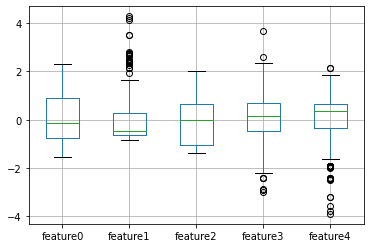

In [34]:
normalised_dataset.boxplot()

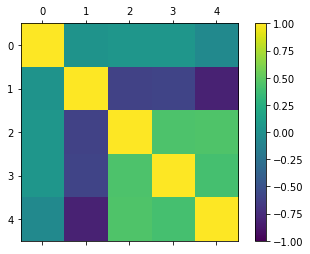

In [35]:
# plotea la matriz de correlacion
correlations = normalised_dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

Calculemos la suma de varianzas:

In [36]:
normalised_dataset.std().values

array([1.00120992, 1.00120992, 1.00120992, 1.00120992, 1.00120992])

In [37]:
np.power(normalised_dataset.std().values,2).sum()

5.012106537530263

## Principal Component Analysis (PCA) ND

Para PCA, la varianza se la denomina varianza explicada.

Previo a ejecutar PCA, se recomienda que los datos estén normalizados al rango 0 a 1, o hayan sido estandarizados (como lo hicimos en el notebook).

¿Cuál es el objetivo de hacer PCA?

Ejecutamos un análisis de componentes principales:

In [38]:
n_allAttr = normalised_dataset.values.shape[1]
n_allAttr

5

In [39]:
from sklearn.decomposition import PCA
pca_real_state_data_FullND = PCA(n_components=n_allAttr)
principalComponents_real_state_data_FullND = pca_real_state_data_FullND.fit_transform(x)

Vamos a crear un nuevo dataframe con los componentes principales:

In [40]:
principal_realState_Df_FullND = pd.DataFrame(data = principalComponents_real_state_data_FullND
             , columns = ['componente principal '+str(i) for i in range(n_allAttr)])

principal_realState_Df_FullND.tail()

,componente principal 0,componente principal 1,componente principal 2,componente principal 3,componente principal 4
409,3.979415,-0.339645,-0.161916,-0.594379,0.136506
410,-1.729819,-0.953950,0.374871,-1.033575,0.100738
411,-1.355807,0.201836,0.423197,-0.267251,0.119395
412,-0.740791,-0.932068,-0.327401,-0.224818,-0.312925
413,-1.730198,-0.876830,0.357976,-1.028880,0.099762


In [41]:
np.power(principal_realState_Df_FullND.std().values,2)

array([2.68011868, 1.0232136 , 0.60604856, 0.55099169, 0.151734  ])

In [42]:
np.power(principal_realState_Df_FullND.std().values,2).sum()

5.012106537530267

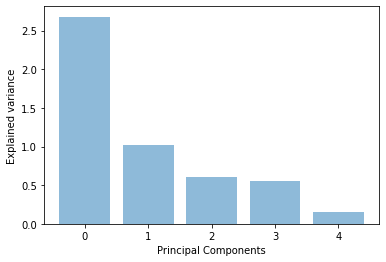

In [43]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
ene = principal_realState_Df_FullND.values.shape[1]
plt.bar(range(0,ene), pca_real_state_data_FullND.explained_variance_,
        alpha=0.5,
        align='center')
plt.ylabel('Explained variance')
plt.xlabel('Principal Components')
plt.show()

Ratio...

### Gráfico spoiler

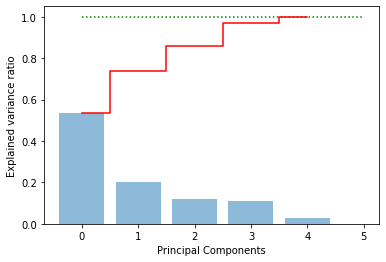

In [44]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
ene = principal_realState_Df_FullND.values.shape[1]
plt.bar(range(0,ene), pca_real_state_data_FullND.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(0,ene), np.cumsum(pca_real_state_data_FullND.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.hlines(1,0,ene, color='g', linestyle=':')
plt.show()

### Si los nuevos atributos son PC, qué debería pasar con la correlación entre las variables?

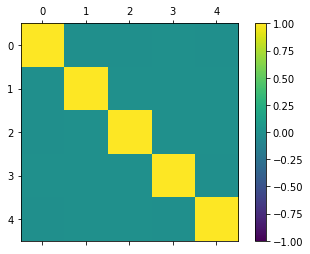

In [45]:
# plotea la matriz de correlacion
correlations = principal_realState_Df_FullND.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

## Principal Component Analysis (PCA) 2D

Ejecutamos un análisis de componentes principales 3D, y creamos un nuevo dataframe con los componentes principales:   <font color=red> (3 puntos) </font>

In [48]:
from sklearn.decomposition import PCA
pca_real_state_data = PCA(n_components=2)
fit_pca_real_state_data = pca_real_state_data.fit(x)
principalComponents_real_state_data = fit_pca_real_state_data.transform(x)

In [49]:
principal_realState_Df = pd.DataFrame(principalComponents_real_state_data , columns = ['componente principal 0', 'componente principal 1'])

principal_realState_Df.tail()

,componente principal 0,componente principal 1
409,3.979415,-0.339645
410,-1.729819,-0.953950
411,-1.355807,0.201836
412,-0.740791,-0.932068
413,-1.730198,-0.876830


Computar el ratio de varianza explicada (`explained_variance_ratio_`). Nos indica la cantidad de información (o varianza) que posee cada componente principal luego de proyectar los datos en un sub-espacio de una dimensión menor. Completar lo solicitado.   <font color=red> (2 puntos) </font>

Varianza explicada: [0.53472899 0.20414841]


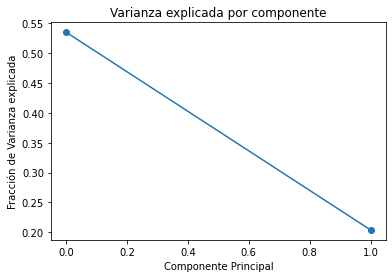

In [52]:
#Debe mostrar/imprimir el explained_variance_ratio para todos los componentes principales

print("Varianza explicada: {}".format(fit_pca_real_state_data.explained_variance_ratio_))

plt.plot(fit_pca_real_state_data.explained_variance_ratio_, marker='o' )  # genera el plot de la varianza explicada
plt.xlabel('Componente Principal')   # etiqueta de eje x
plt.ylabel('Fracción de Varianza explicada')   # etiqueta de eje y
plt.title('Varianza explicada por componente')  # titulo
plt.show()

Completar: Se observa que el primer componente principal tiene el 53.5% de la información, y el segundo solamente el 20.4%. Al proyectar en un espacio de dimensión 2, se ha perdido aproximadamente un 26.1% de información.

## Ejemplo de scatter plot con colores diferentes (en matplotlib)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

df_ejemplo = sns.load_dataset('iris')

plt.figure(figsize=(12,12))
 
# Keep the 'specie' column appart + make it numeric for coloring
df_ejemplo['species']=pd.Categorical(df_ejemplo['species'])
my_color=df_ejemplo['species'].cat.codes
df_ejemplo = df_ejemplo.drop('species', 1)

<Figure size 864x864 with 0 Axes>

In [54]:
df_ejemplo.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Para este ejemplo, vamos a ignorar el último atributo (`'petal_width'`).

Text(0.5, 0.92, 'Iris dataset (First 3 attributes)')

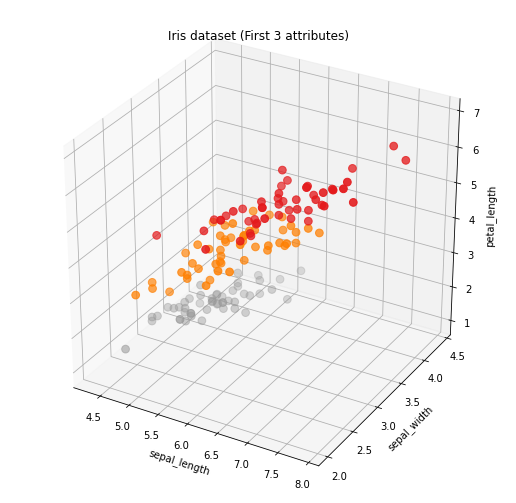

In [55]:
fig = plt.figure(figsize=[9,9])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ejemplo['sepal_length'], df_ejemplo['sepal_width'], df_ejemplo['petal_length'], c=my_color, cmap="Set1_r", s=60)
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')
ax.set_title('Iris dataset (First 3 attributes)')

## Interpretación gráfica del PCA 2D

- Hacer un scatter plot 2D mostrando las muestras del dataset en el espacio PCA 2D (cada categoría con un color diferente del marcador):   <font color=red> (2 puntos) </font>

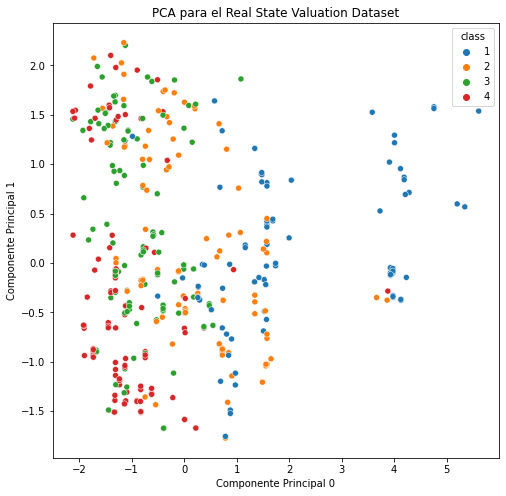

In [64]:
principal_realState_Df['class'] = real_state_data['binned']

plt.figure(figsize=(8, 8))

sns.scatterplot(data=principal_realState_Df, x='componente principal 0', y='componente principal 1', hue='class')
plt.title("PCA para el Real State Valuation Dataset")
plt.xlabel('Componente Principal 0')
plt.ylabel('Componente Principal 1')
plt.show()

## Principal Component Analysis (PCA) 3D

In [65]:
normalised_dataset = pd.DataFrame(x,columns=feat_cols)

In [66]:
normalised_dataset.tail()

,feature0,feature1,feature2,feature3,feature4
409,-0.352637,2.378365,-1.391638,-2.216993,-1.927835
410,-1.064493,-0.788071,1.667503,0.427579,0.635341
411,0.095568,-0.549678,0.987694,0.822893,0.423972
412,-0.844784,-0.776684,0.307885,-0.184755,0.476814
413,-0.985398,-0.788071,1.667503,0.427579,0.635341


Ejecutamos un análisis de componentes principales 3D, y creamos un nuevo dataframe con los componentes principales:   <font color=red> (3 puntos) </font>

In [67]:
from sklearn.decomposition import PCA
pca_real_state_data_3D = PCA(n_components=3)
fit_pca_real_state_data_3D = pca_real_state_data_3D.fit(x)
principalComponents_real_state_data_3D = fit_pca_real_state_data_3D.transform(x)

In [68]:
principal_realState_Df_3D = pd.DataFrame(principalComponents_real_state_data_3D, columns = ['componente principal 0', 'componente principal 1', 'componente principal 2'])

principal_realState_Df_3D.tail()

,componente principal 0,componente principal 1,componente principal 2
409,3.979415,-0.339645,-0.161916
410,-1.729819,-0.953950,0.374871
411,-1.355807,0.201836,0.423197
412,-0.740791,-0.932068,-0.327401
413,-1.730198,-0.876830,0.357976


Computar el ratio de varianza explicada (`explained_variance_ratio_`). Nos indica la cantidad de información (o varianza) que posee cada componente principal luego de proyectar los datos en un sub-espacio de una dimensión menor. Completar lo solicitado.   <font color=red> (2 puntos) </font>

Varianza explicada: [0.53472899 0.20414841 0.12091694]


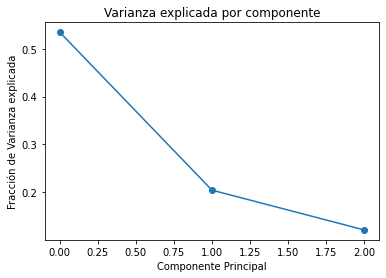

In [69]:
print("Varianza explicada: {}".format(fit_pca_real_state_data_3D.explained_variance_ratio_))

plt.plot(fit_pca_real_state_data_3D.explained_variance_ratio_, marker='o' )  # genera el plot de la varianza explicada
plt.xlabel('Componente Principal')   # etiqueta de eje x
plt.ylabel('Fracción de Varianza explicada')   # etiqueta de eje y
plt.title('Varianza explicada por componente')  # titulo
plt.show()

Se observa que el tercer componente principal tiene el 12.1% de la información. Al proyectar en un espacio de dimensión 3, se ha perdido aproximadamente un 14% de información.

## Interpretación gráfica del PCA 3D

- Hacer un scatter plot 3D mostrando las muestras del dataset en el espacio PCA 3D (cada categoría con un color diferente del marcador):   <font color=red> (2 puntos) </font>

Text(0.5, 0.92, 'PCA con coloración en valores discretos')

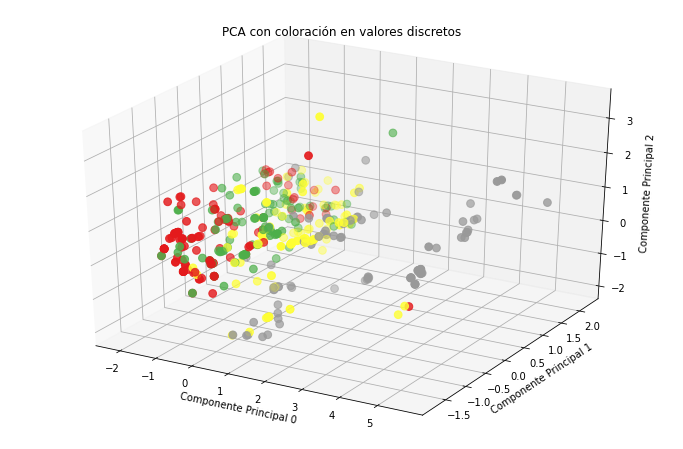

In [72]:
principal_realState_Df_3D['class'] = real_state_data['binned']

fig = plt.figure(figsize=[12,8])

principal_realState_Df_3D['class']=pd.Categorical(principal_realState_Df_3D['class'])
my_color=principal_realState_Df_3D['class'].cat.codes

ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_realState_Df_3D['componente principal 0'], principal_realState_Df_3D['componente principal 1'], principal_realState_Df_3D['componente principal 2'], c=my_color, cmap="Set1_r", s=60)
ax.set_xlabel('Componente Principal 0')
ax.set_ylabel('Componente Principal 1')
ax.set_zlabel('Componente Principal 2')
ax.set_title('PCA con coloración en valores discretos')

## Interpretación gráfica del PCA 3D (con los targets no categorizados)

In [73]:
import seaborn as sns

In [74]:
cmap = sns.color_palette("viridis", as_cmap=True)

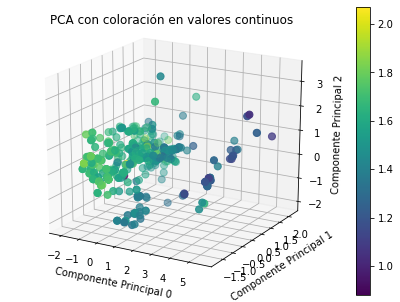

In [75]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

plt.clf()

# puedes cambiar estos valores para modificar la visualización 3D de la gráfica
elev = +20
azim = -60

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

ax.set_xlabel('Componente Principal 0')
ax.set_ylabel('Componente Principal 1')
ax.set_zlabel('Componente Principal 2')
ax.set_title("PCA con coloración en valores continuos")

points = ax.scatter(principal_realState_Df_3D['componente principal 0'].values ,
           principal_realState_Df_3D['componente principal 1'].values ,
           principal_realState_Df_3D['componente principal 2'].values , c = np.log10(precios), s = 50, cmap = cmap)

fig.colorbar(points)

## Consulta de coordenadas PCA de un nuevo dato  <font color=red> (1 punto) </font>

Calcular (usando Python) las coordenadas PCA 3D de una casa con los siguientes atributos:

- Cantidad de tiendas cercanas: 7
- Longitud geográfica: 121.54451
- Distancia a la estación MRT más cercana: 1596.14
- Edad de la casa: 23
- Latitud geográfica: 24.96731

In [80]:
new_real_state_data = real_state_data.loc[:, features]

data = [23, 1596.14, 7, 24.96731, 121.54451]
new_real_state_data.append(data, ignore_index=True)
new_real_state_data.tail()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067
413,6.5,90.45606,9,24.97433,121.54310
